In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("telco.csv")
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_type,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


# 3 Step Process to Analyzing Your Data (General case)
- Define your goal, why this matters, your target variable, initial hypotheses (write these down)
- Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
- Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)


In [3]:
#my initial hyponthesis is that it is time or money related

<AxesSubplot:>

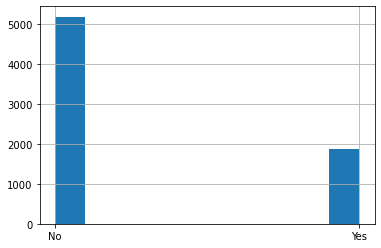

In [4]:
#a histogram gives us an idea of how the two compare
df.churn.hist()

In [5]:
#this gives us more tangible numbers to work with
df.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [6]:
df.shape

(7049, 27)

In [7]:
df.churn.shape[0]
#now we have a total volume to shape a percentage from

7049

In [8]:
# df[df.Attrition == "Yes"].shape[0] / df.shape[0]
df[df.churn == "Yes"].shape[0] / df.shape[0]
#now we can see that about a quarter of all customers have left

0.2652858561498085

In [9]:
df.info()
#in researching and looking for material to understand this stuff
#the window of when churn happens becomes more and more apparent 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   int64  
 6   internet_service        7049 non-null   int64  
 7   contract_type           7049 non-null   int64  
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  is_female               7049 non-null   bool   
 14  has_churned             7049 non-null   

In [10]:
(df.churn == "Yes").sum()
#this is our total of churner's for this dataset
#we we need a quantifiable way to  see just how much a company is losing
#a question here would be to ask what how much a customer is worth

1870

# Why does this matter? <br> 
##  I just realised that the way i can quantify impact is by measuring  an average amount that the customer could have potentially brought

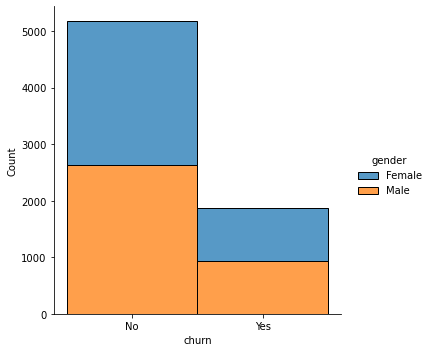

In [11]:
sns.displot(x='churn', data=df, hue="gender", multiple="stack")
#as we can see there doesn't seem to be an easy correlation to gender compared to churn

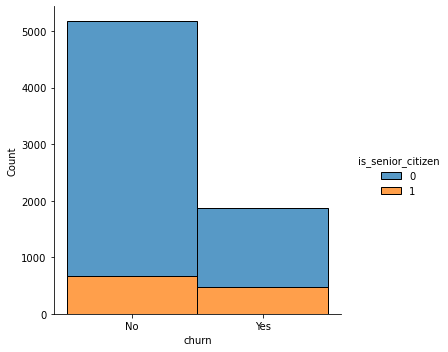

In [12]:
sns.displot(data=df, x='churn', hue="is_senior_citizen", multiple="stack")
#there is no obvious correlation to being a senior citizen

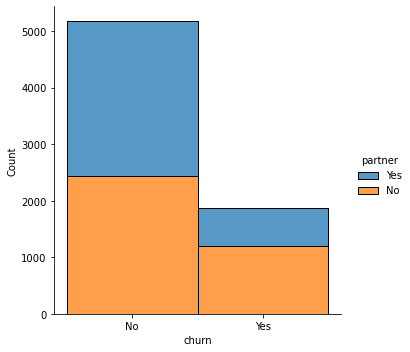

In [13]:
#i feel like there may be something here that i am missing
sns.displot(data=df, x='churn', hue="partner", multiple="stack")


<AxesSubplot:xlabel='churn', ylabel='is_senior_citizen'>

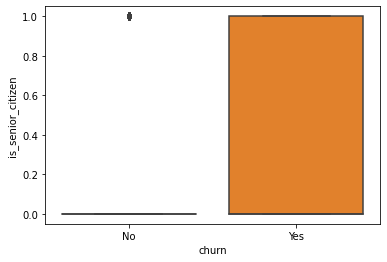

In [14]:
#this tells me almost nothing...almost, what it does say is that senior citizens churn
sns.boxplot(data = df,  x="churn", y="is_senior_citizen")

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

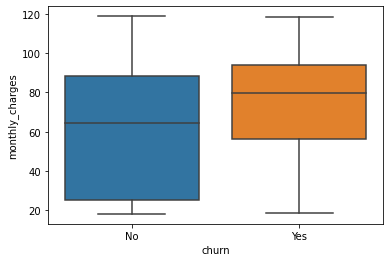

In [15]:
#what we are starting to see is that most of the people leaving are people that care getting charged 60-90 monthly
sns.boxplot(data = df,  x="churn", y="monthly_charges")

<AxesSubplot:xlabel='churn', ylabel='total_charges'>

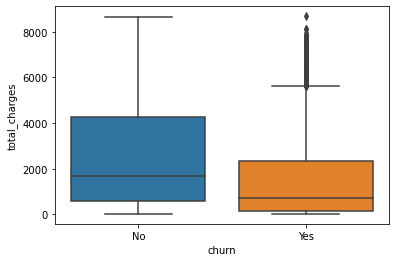

In [16]:
#there isn't enough of a  pattern here to descern causality, not an easy way anyway
sns.boxplot(data = df,  x="churn", y="total_charges")

In [17]:
#now i can find code that shoes the average sum of the customers lost
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_type,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


In [18]:
#I am proud of finding the solution on this one
df.monthly_charges[df.churn == "Yes"]
#This function let's us see the amounts that customers paid who left the company

2       73.90
3       98.00
4       83.90
18      62.70
19      25.10
        ...  
7023    83.85
7031    30.50
7042    70.15
7043    20.95
7045    85.10
Name: monthly_charges, Length: 1870, dtype: float64

In [19]:
#of which total all the way up to 139161.35
df.monthly_charges[df.churn == "Yes"].sum()

139161.35

In [20]:
#lets turn this into a callable variable to possibly reference in the future
monthly_loss = df.monthly_charges[df.churn == "Yes"].sum()
monthly_loss * 12
#on its own this isn't too crazy but how can we emphasize a note?
#hyperbole!
#over the course of a year that is a total of 1669936.20

1669936.2000000002

## found it! my big pressing thumnail

In [21]:
#"If you can hold out for 8 more months you'll have a million dollar total return" - working title
monthly_loss*8

1113290.8

## possible lead

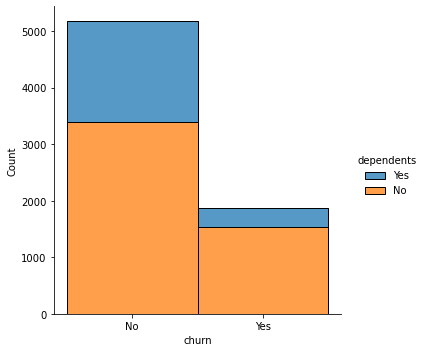

In [22]:
#find the rest of the other attributing factors and how they play with churn
sns.displot(data = df,  x="churn", hue="dependents", multiple="stack")
#there might be something here because this looks different

## phone_service possible lead

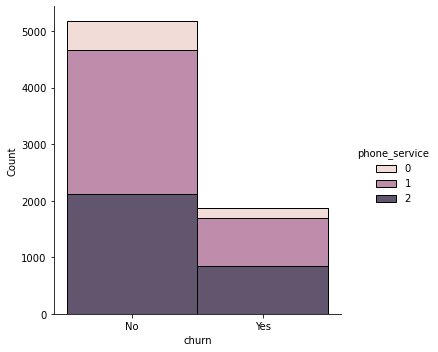

In [23]:
sns.displot(data = df,  
            x="churn",
            hue="phone_service",
           color="firebrick",
            multiple="stack")
# I think there might be something to this

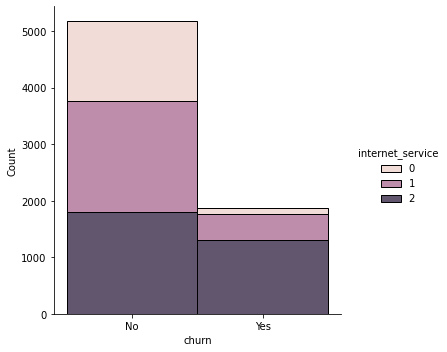

In [24]:
sns.displot(data = df,  
            x="churn",
            hue="internet_service",
            multiple="stack")

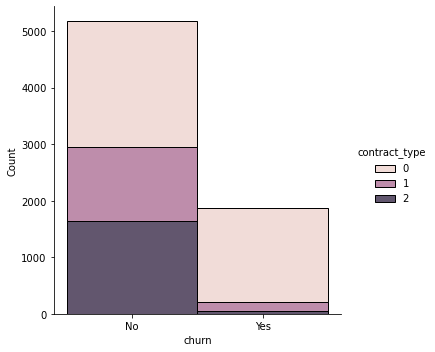

In [25]:
sns.displot(data = df,  
            x="churn",
            hue="contract_type",
            multiple="stack")

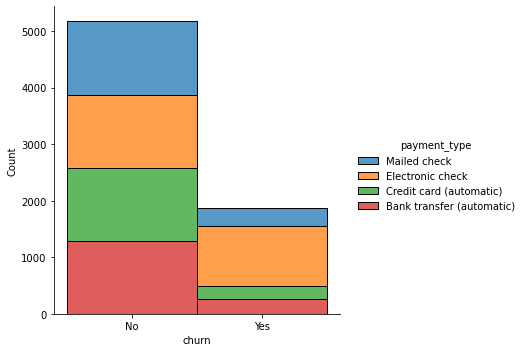

In [26]:
sns.displot(data = df,  
            x="churn",
            hue="payment_type",
            multiple="stack")

<AxesSubplot:xlabel='churn', ylabel='total_charges'>

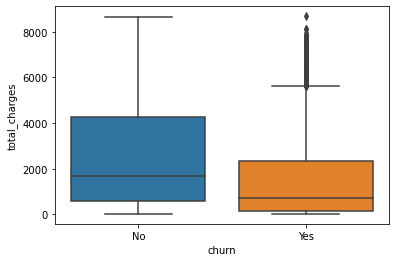

In [27]:
sns.boxplot(data = df,  
            x="churn",
            y="total_charges",)
#             multiple="stack")

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

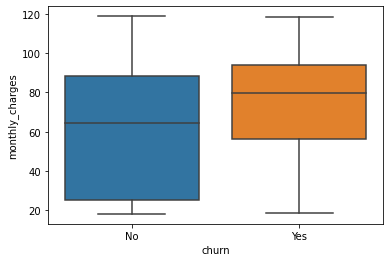

In [28]:
sns.boxplot(data = df,  
            x="churn",
            y="monthly_charges",)

<AxesSubplot:xlabel='churn', ylabel='tenure'>

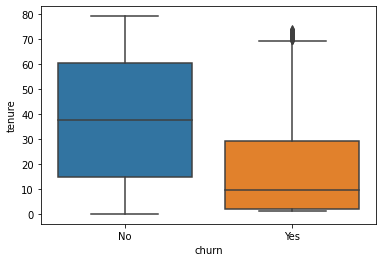

In [29]:
sns.boxplot(data = df,  
            x="churn",
            y="tenure",)

In [30]:
ten_chun=pd.crosstab(index=df.tenure, columns=df.churn)
ten_chun

churn,No,Yes
tenure,,
0.0,11,0
1.0,233,381
1.4,1,1
1.5,1,2
1.6,8,2
...,...,...
76.9,1,0
77.1,1,0
77.2,2,0


In [36]:
df.monthly_charges[df.Internet_service_type=="Fiber Optic"].sum()
#.monthly_charges

283479.30000000005